In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Neural Network

In [27]:
class NeuralNetwork:
    W = []
    M = []
    b = []
    Yhat = []
    costs = []
    actf = 0
    
    def __sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def __tanh(self, Z):
        return np.tanh(Z)
    
    def __relu(self,Z):
        return Z * (Z > 0)
    
    # Calls specified activation function
    def __sig(self,Z,ty):
        if ty == 0:
            return self.__sigmoid(Z)
        if ty == 1:
            return self.__tanh(Z)
        else:
            return self.__relu(Z)
        
        # Calls specified activation function derivative
    def __sig_dv(self,Z,ty):
        if ty == 0:
            return Z*(1-Z)
        if ty == 1:
            return (1-Z*Z)
        else:
            return np.where(Z > 0, 1, 0)
        
    def __softmax(self,A):
        expA = np.exp(A)
        return expA / expA.sum(axis=1,keepdims=True)
    
    # Cost for softmax
    def __cost(self,T,Y):
        tot = (-T * np.log(Y))
        return tot.sum()
    
    def classification_rate(self,T):
        Yhat = NeuralNetwork.Yhat
        Yp = np.argmax(Yhat,axis=1)
        print('Classification rate: ', np.mean(T == Yp))
    
    # Adds hidden layer with L nodes
    def add_layer(self,L):
        NeuralNetwork.M.append(L)
    
    def __forward(self,M,W,b,actf):
        for i in range(1,len(W)+1):
            if (i != len(W)):
                M[i] = self.__sig((M[i-1].dot(W[i-1]) + b[i-1]), actf)
            else:
                M[i] = M[i-1].dot(W[i-1]) + b[i-1]
                Y = self.__softmax(M[i])
        return Y,M
    
    def fit(self,X,y,a,n_iter,learnR,reg):
        W = NeuralNetwork.W
        b = NeuralNetwork.b
        M = NeuralNetwork.M
        NeuralNetwork.actf = a
        
        # Initialize layers for M
        N = X.shape[0]
        for i in range(len(M)):
            M[i] = np.random.randn(N,M[i])
            
        K = len(set(y))
        M.insert(0,X)
        M.append(np.random.randn(N,K))
        l = learnR
        
        # Set indicator matrix
        Y = np.zeros((N,K))
        for i in range(N):
            Y[i,y[i]] = 1
            
        # Set weights
        for i in range(len(M)-1):
            if i == (len(M)-2):
                W.append(np.random.randn(M[i].shape[1],K) / np.sqrt(M[i].shape[1] + K))
                b.append(np.random.randn(K) / np.sqrt(K))
            else:
                W.append(np.random.randn(M[i].shape[1],M[i+1].shape[1]) / np.sqrt(M[i].shape[1] + M[i+1].shape[1]))
                b.append(np.random.randn(M[i+1].shape[1]) / np.sqrt(M[i+1].shape[1]))
                
        costs = []
        for e in range(n_iter):
            Yp,Z = self.__forward(M,W,b,a)
            cost = self.__cost(Y,Yp)
            costs.append(cost)
            if e % 1000 == 0:
                print(e,cost)
            
            # Adjust weights
            S = (Y - Yp)
            n = len(M)-2
            Zt = S
            
            for i in range(len(M)-1):
                W[n] += l * (Z[n].T.dot(Zt) - reg*W[n])
                b[n] += l * (Zt.sum() - reg*b[n])
                
                if i != (len(M)-2):
                    #Update Zt
                    Zt = Zt.dot(W[n].T)*self.__sig_dv(Z[n],a)
            
                n -= 1
        NeuralNetwork.W = W
        NeuralNetwork.b = b
        NeuralNetwork.M = M
        NeuralNetwork.Yhat = Yp
        NeuralNetwork.costs = costs
    
    def predict(self,X):
        W = NeuralNetwork.W
        b = NeuralNetwork.b
        M = NeuralNetwork.M
        a = NeuralNetwork.actf
        Yp,Z = self.__forward(M,W,b,a)
        NeuralNetwork.Yhat = Yp
        return Yp
    
    def plot_cost(self):
        costs = NeuralNetwork.costs
        plt.plot(costs)
        plt.show()
    
    def reset(self):
        NeuralNetwork.W = []
        NeuralNetwork.b = []
        NeuralNetwork.M = []
        NeuralNetwork.Yhat = []
        NeuralNetwork.costs = []

## Training Data

In [28]:
model = NeuralNetwork()

In [29]:
# Tests
Nclass = 500
X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])

X = np.concatenate((X1,X2,X3), axis=0)
#X = np.vstack([X1, X2, X3])

X1_t = np.random.randn(Nclass, 2) + np.array([0, -2])
X2_t = np.random.randn(Nclass, 2) + np.array([2, 2])
X3_t = np.random.randn(Nclass, 2) + np.array([-2, 2])

X_test = np.concatenate((X1_t,X2_t,X3_t), axis=0)

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

In [30]:
model.add_layer(4)
model.add_layer(5)

In [35]:
# (X, Y, activation func, # iterations, learning rate, regulization)
model.fit(X,Y,0,20000,10e-6,0)

0 1121.037754183014
1000 187.13433953851052
2000 160.095364147221
3000 149.6078838580812
4000 143.94133109474504
5000 140.3845114275548
6000 137.95146167064672
7000 136.19157417975703
8000 134.8677296942572
9000 133.84254909593255
10000 133.03067414723023
11000 132.3761749340921
12000 131.84084237591253
13000 131.39768041598182
14000 131.02707971144667
15000 130.71446218479912
16000 130.44877441936487
17000 130.2214922348739
18000 130.0259444502527
19000 129.8568422634429


In [37]:
#
model.predict(X_test)

array([[9.48909711e-01, 4.98267813e-02, 1.26350802e-03],
       [9.99984188e-01, 1.33562095e-05, 2.45577200e-06],
       [9.79665600e-01, 2.76042998e-03, 1.75739700e-02],
       ...,
       [4.60846910e-06, 3.71641489e-04, 9.99623750e-01],
       [5.31050415e-08, 1.52126707e-02, 9.84787276e-01],
       [9.89949628e-07, 3.83379087e-02, 9.61661101e-01]])

In [38]:
model.classification_rate(Y)

Classification rate:  0.9673333333333334


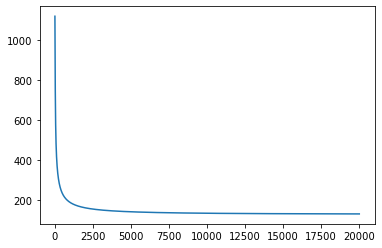

In [40]:
model.plot_cost()